In [1]:
in_files = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/subsamples/knn/kparam_30/donor0/params.csv;/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/subsamples/knn/kparam_30/donor1/params.csv;/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/subsamples/knn/kparam_30/donor0/params.csv;/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/subsamples/knn/kparam_30/donor1/params.csv;/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/subsamples/knn/kparam_30/donor0/params.csv;/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/subsamples/knn/kparam_30/donor1/params.csv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/comparisons_subsamples/""

In [2]:
in_params_l = in_files.split(";")
in_params_l

['/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/subsamples/knn/kparam_30/donor0/params.csv',
 '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/subsamples/knn/kparam_30/donor1/params.csv',
 '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/subsamples/knn/kparam_30/donor0/params.csv',
 '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/subsamples/knn/kparam_30/donor1/params.csv',
 '/data/Mito_Trace/output/

In [3]:
from os.path import dirname, join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gmean
from sklearn.metrics import auc 

In [4]:
all_scores = []
all_params = []
for i in in_params_l:
    curr_df = pd.read_csv(join(dirname(i), "subsample_metrics.tsv"), sep="\t", index_col=0)
    curr_params = pd.read_csv(i, index_col=0)
    for x in curr_params.index:
        curr_df[x] = curr_params.loc[x, "0"] 
    all_scores.append(curr_df)
    all_params.append(curr_params)

In [5]:
all_scores_df = pd.concat(all_scores, axis=0)
all_scores_df

,silhouette score,adjusted nmi,percent subbsample,variants,kparam,d
0,-0.145762,0.544524,10.0,init,30,0
1,-0.150199,0.532219,10.0,init,30,0
2,-0.197228,0.539059,10.0,init,30,0
3,-0.212276,0.525818,10.0,init,30,0
4,-0.155435,0.533391,10.0,init,30,0
...,...,...,...,...,...,...
695,-0.008668,0.864769,99.0,prefilterMerge_impute,30,1
696,-0.015672,0.853619,99.0,prefilterMerge_impute,30,1
697,-0.007257,0.839654,99.0,prefilterMerge_impute,30,1
698,-0.008464,0.909285,99.0,prefilterMerge_impute,30,1


In [6]:
all_scores_df.duplicated().sum()

0

In [7]:
all_scores_df["method"] = all_scores_df.apply(lambda x: f'v:{x["variants"]}_k:{x["kparam"]}', axis=1)
all_scores_df["method_donor"] = all_scores_df.apply(lambda x: f'v:{x["variants"]}_k:{x["kparam"]}_donor:{x["d"]}', axis=1)
all_scores_df

,silhouette score,adjusted nmi,percent subbsample,variants,kparam,d,method,method_donor
0,-0.145762,0.544524,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
1,-0.150199,0.532219,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
2,-0.197228,0.539059,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
3,-0.212276,0.525818,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
4,-0.155435,0.533391,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
...,...,...,...,...,...,...,...,...
695,-0.008668,0.864769,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
696,-0.015672,0.853619,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
697,-0.007257,0.839654,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
698,-0.008464,0.909285,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1


<AxesSubplot:xlabel='percent subbsample', ylabel='adjusted nmi'>

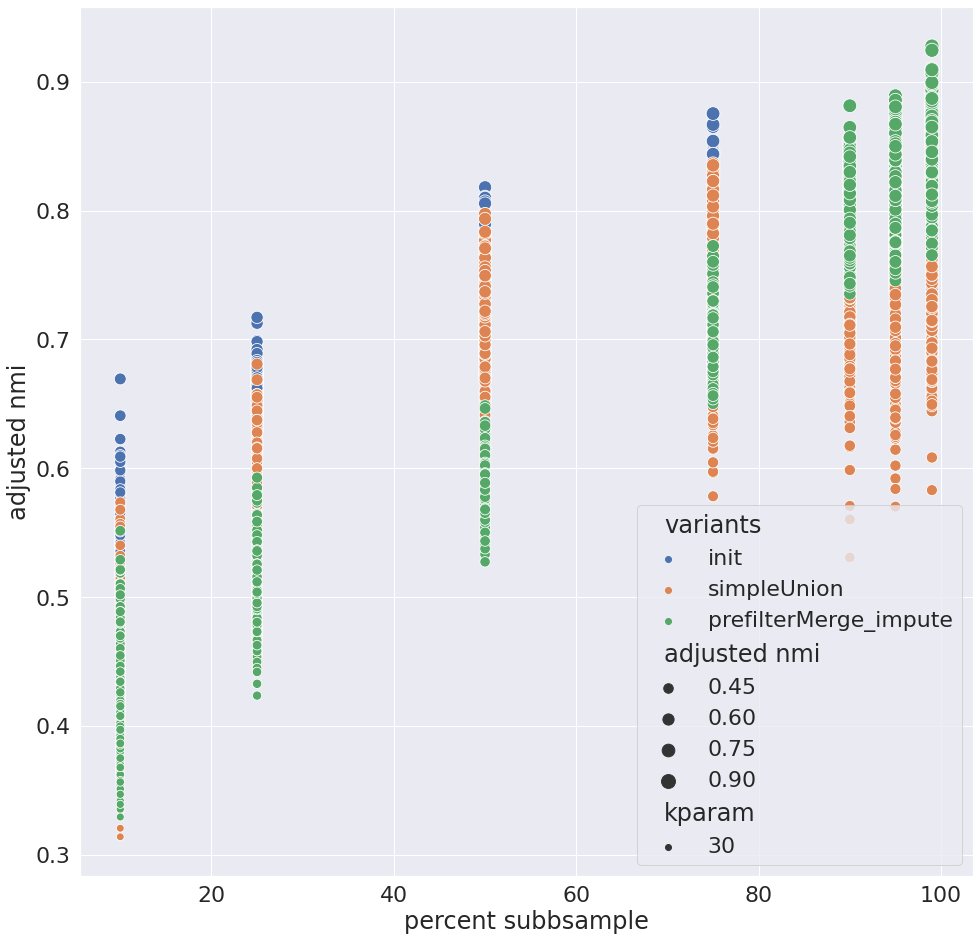

In [9]:
#auc(x, y)
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(16,16))


sns.scatterplot(data=all_scores_df, x="percent subbsample", y="adjusted nmi", sizes=(60,200),
                hue="variants", style="kparam", size="adjusted nmi", ax=ax)

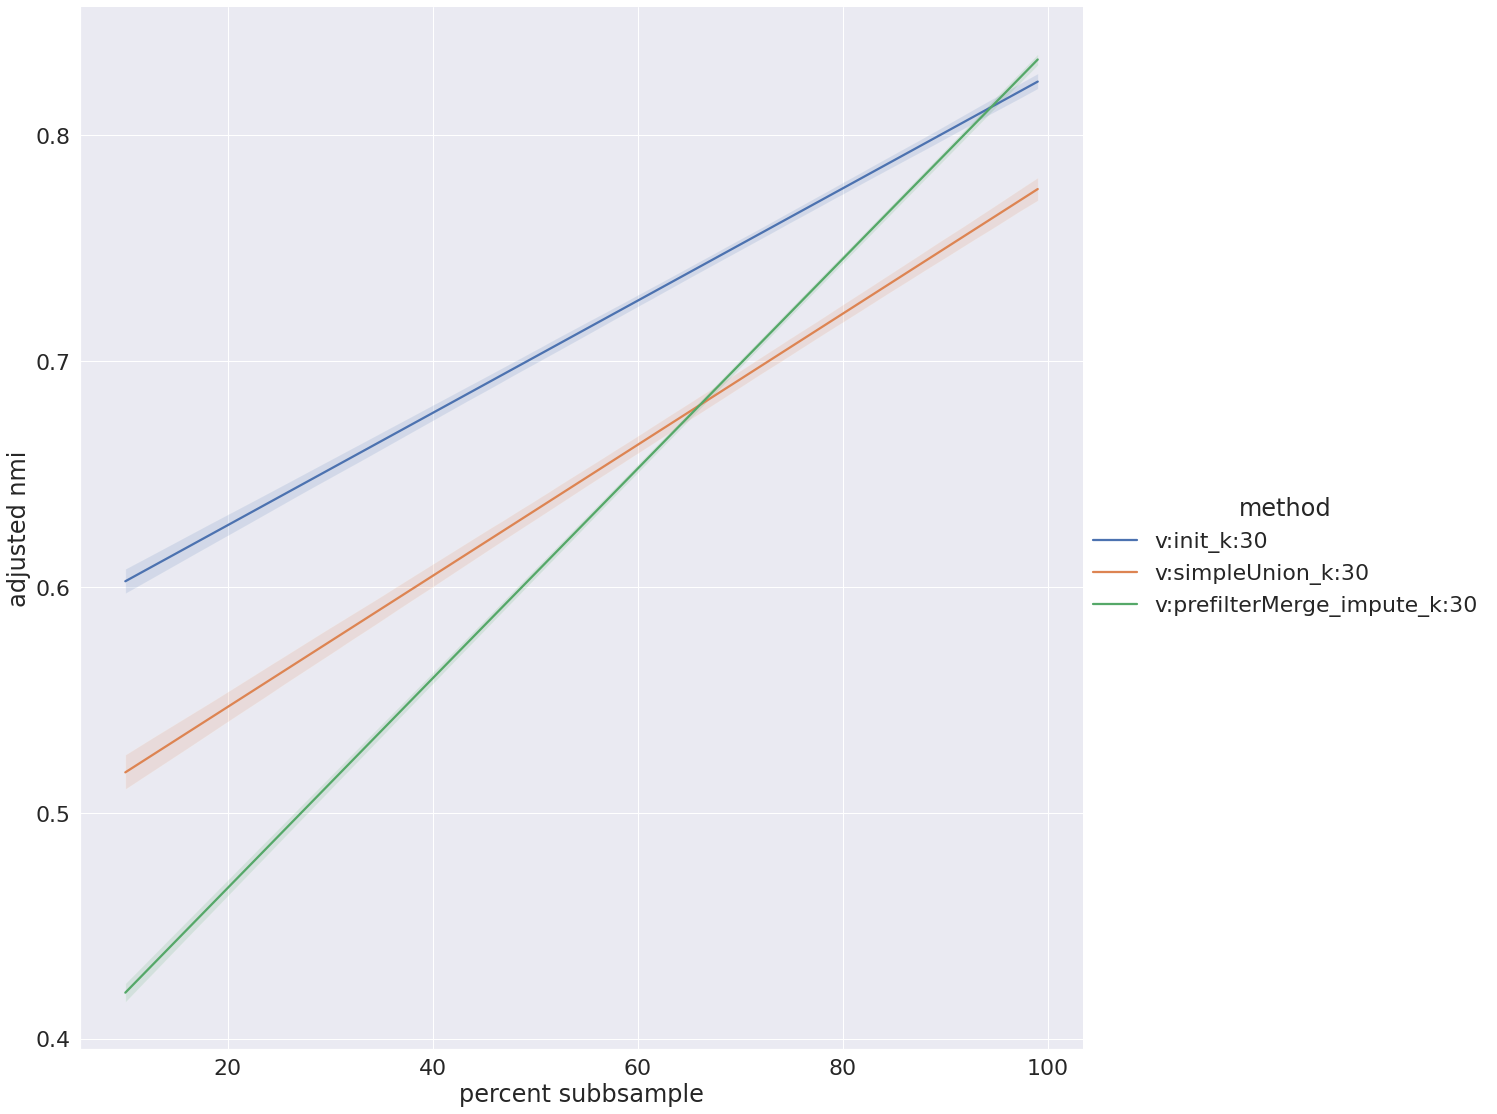

In [10]:
sns.set(font_scale=2)
sns.lmplot(data=all_scores_df, x="percent subbsample", y="adjusted nmi", scatter_kws={"s": 200},
                hue="method", height=16, aspect=1, scatter=False,x_ci="sd")#style="kparam", size="adjusted nmi", ax=ax)
plt.savefig(join(outdir, "methods_nmi_regplot.pdf"))

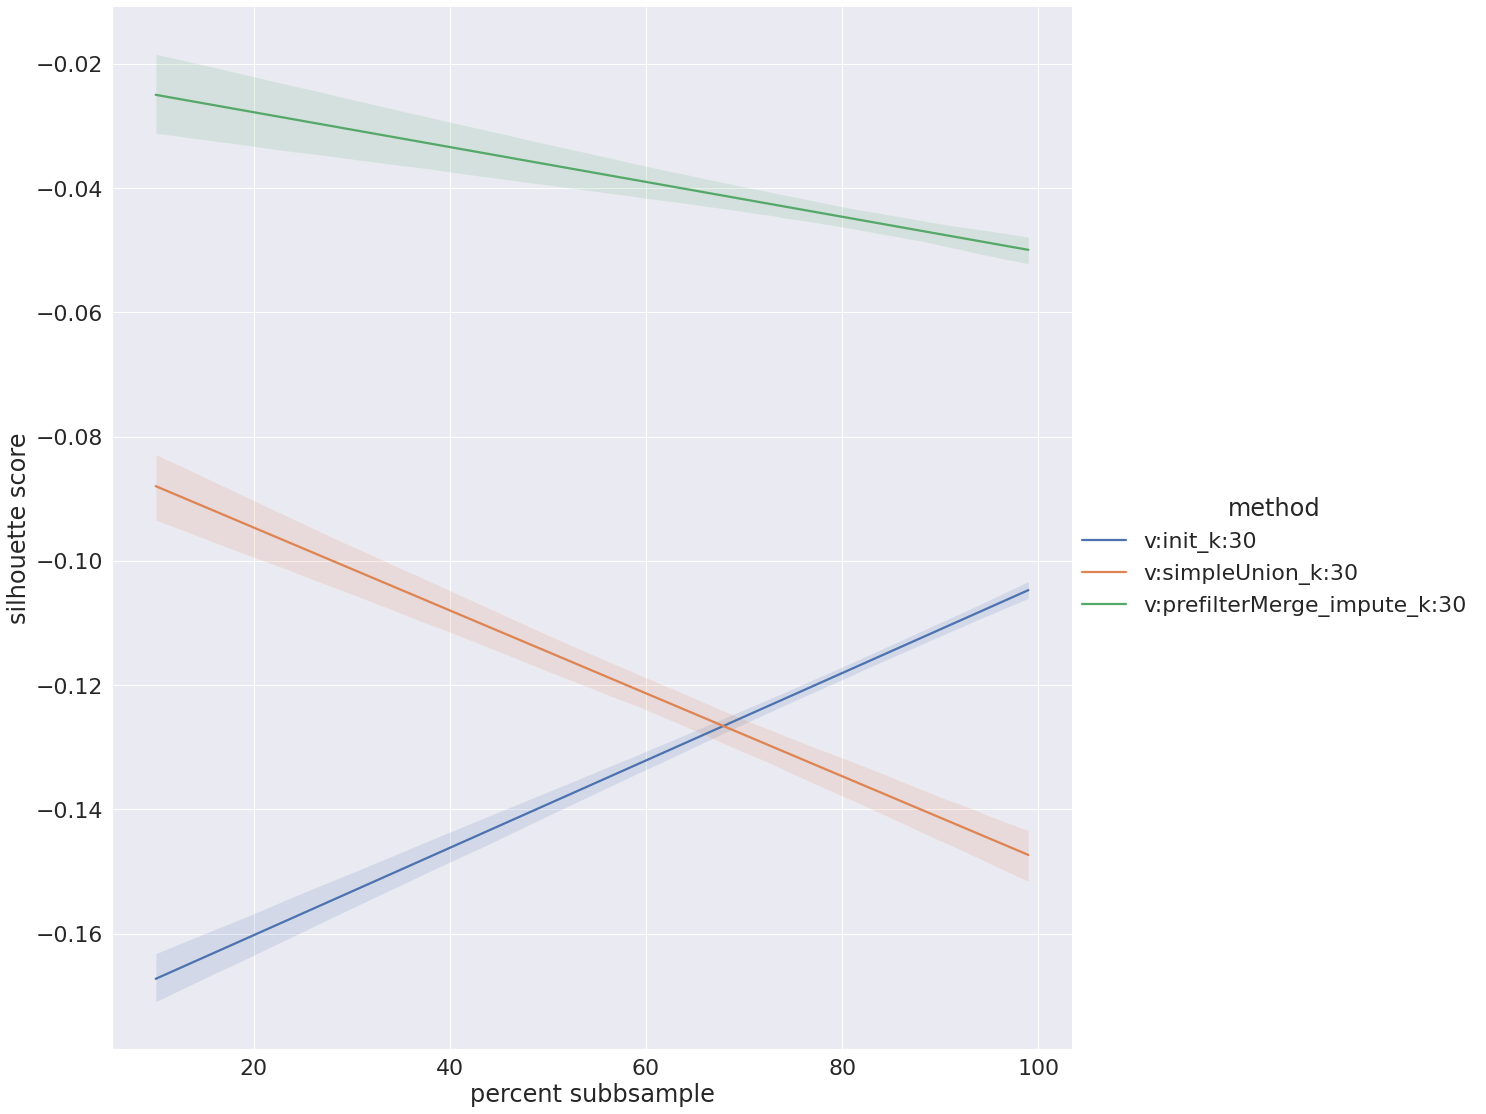

In [11]:
sns.set(font_scale=2)
sns.lmplot(data=all_scores_df, x="percent subbsample", y="silhouette score", scatter_kws={"s": 200},
                hue="method", height=16, aspect=1, scatter=False, x_ci="sd")#style="kparam", size="adjusted nmi", ax=ax)
plt.savefig(join(outdir, "methods_silhouette_regplot.pdf"))

In [11]:
all_scores_df

,silhouette score,adjusted nmi,percent subbsample,variants,kparam,d,method,method_donor
0,-0.145762,0.544524,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
1,-0.150199,0.532219,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
2,-0.197228,0.539059,10.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
3,-0.155547,0.644237,25.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
4,-0.131197,0.656090,25.0,init,30,0,v:init_k:30,v:init_k:30_donor:0
...,...,...,...,...,...,...,...,...
16,-0.053539,0.857970,95.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
17,-0.012024,0.816717,95.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
18,-0.006016,0.868891,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1
19,-0.012169,0.863660,99.0,prefilterMerge_impute,30,1,v:prefilterMerge_impute_k:30,v:prefilterMerge_impute_k:30_donor:1


In [12]:
mean_scores_df = all_scores_df.groupby(["percent subbsample", "method"]).mean().reset_index()
mean_scores_df

,percent subbsample,method,silhouette score,adjusted nmi
0,10.0,v:init_k:30,-0.167678,0.552242
1,10.0,v:prefilterMerge_impute_k:30,0.026669,0.430066
2,10.0,v:simpleUnion_k:30,-0.053195,0.430428
3,25.0,v:init_k:30,-0.172017,0.660055
4,25.0,v:prefilterMerge_impute_k:30,-0.047644,0.488744
5,25.0,v:simpleUnion_k:30,-0.116568,0.602845
6,50.0,v:init_k:30,-0.109532,0.753739
7,50.0,v:prefilterMerge_impute_k:30,-0.099592,0.582438
8,50.0,v:simpleUnion_k:30,-0.150685,0.719140
9,75.0,v:init_k:30,-0.123225,0.787310


In [13]:
nmi_auc = {}
for ind, val in mean_scores_df.groupby("method"):
    nmi_auc[ind] = auc(val["percent subbsample"], val["adjusted nmi"]) 

In [14]:
silh_auc = {}
for ind, val in mean_scores_df.groupby("method"):
    silh_auc[ind] = auc(val["percent subbsample"], val["silhouette score"]) 

In [15]:
silh_auc

{'v:init_k:30': -11.639840556075875,
 'v:prefilterMerge_impute_k:30': -5.051961471289794,
 'v:simpleUnion_k:30': -12.303537618844738}

In [16]:
metrics = pd.concat((pd.DataFrame(silh_auc, index=["silhouette score"]),
                     pd.DataFrame(nmi_auc, index=["adjusted nmi"])), axis=0).transpose()
metrics_rank = metrics.rank(ascending=True)
metrics_rank


,silhouette score,adjusted nmi
v:init_k:30,2.0,3.0
v:prefilterMerge_impute_k:30,3.0,1.0
v:simpleUnion_k:30,1.0,2.0


In [17]:
metrics["geometric mean"] = metrics_rank.apply(gmean, axis=1)
metrics = metrics.sort_values("geometric mean")[::-1]
metrics.to_csv(join(outdir, "methods.csv"))
metrics

,silhouette score,adjusted nmi,geometric mean
v:init_k:30,-11.639841,64.996667,2.449490
v:prefilterMerge_impute_k:30,-5.051961,54.606272,1.732051
v:simpleUnion_k:30,-12.303538,60.175428,1.414214


<AxesSubplot:>

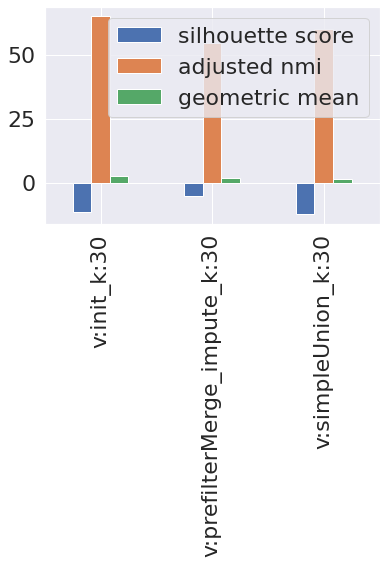

In [18]:
metrics.plot.bar()